In [1]:
### IMPORT: ------------------------------------
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
# from scipy.stats import skew

In [2]:
df = pd.read_csv('insurance.csv')
insured=df.copy()

In [3]:
insured.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
insured.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
insured.shape

(1338, 7)

In [6]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
insured.isnull()

,age,sex,bmi,children,smoker,region,expenses
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [9]:
insured.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [10]:
insured['sex'] = insured['sex'].astype("category")
insured['children'] = insured['children'].astype("category")
insured['smoker'] = insured['smoker'].astype("category")
insured['region'] = insured['region'].astype("category")

In [11]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.4 KB


In [12]:
insured.describe()

,age,bmi,expenses
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,13270.422414
std,14.049960,6.098382,12110.011240
min,18.000000,16.000000,1121.870000
25%,27.000000,26.300000,4740.287500
50%,39.000000,30.400000,9382.030000
75%,51.000000,34.700000,16639.915000
max,64.000000,53.100000,63770.430000


In [13]:
insured.select_dtypes(["category"])

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


In [14]:
insured.select_dtypes(["float"])

,bmi,expenses
0,27.9,16884.92
1,33.8,1725.55
2,33.0,4449.46
3,22.7,21984.47
4,28.9,3866.86
...,...,...
1333,31.0,10600.55
1334,31.9,2205.98
1335,36.9,1629.83
1336,25.8,2007.95


In [15]:
insured.select_dtypes(["category"]).columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [16]:
insured.select_dtypes(["float"]).columns

Index(['bmi', 'expenses'], dtype='object')

In [17]:
insured.select_dtypes(["int"])

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [18]:
insured.select_dtypes(["int"]).columns

Index(['age'], dtype='object')

In [19]:
insured['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [20]:
insured['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [21]:
insured['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [22]:
insured['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [23]:
insured[insured['expenses'] > 20000].value_counts()

age  sex     bmi   children  smoker  region     expenses
18   female  30.1  0         no      northeast  21344.85    1
51   female  35.0  2         yes     northeast  44641.20    1
52   female  24.1  1         yes     northwest  23887.66    1
51   male    42.9  2         yes     southeast  47462.89    1
             24.8  2         yes     northwest  23967.38    1
                                                           ..
37   male    29.8  0         no      southwest  20420.60    1
             34.1  4         yes     southwest  40182.25    1
             34.2  1         yes     northeast  39047.29    1
             37.1  1         yes     southeast  39871.70    1
64   male    37.0  2         yes     southeast  49577.66    1
Length: 273, dtype: int64

In [24]:
# Univariant

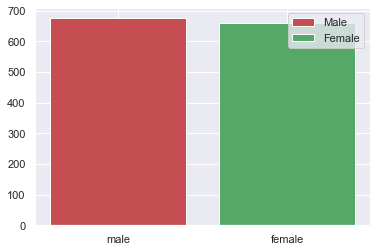

In [25]:
no_of_male = len(insured[insured['sex'] == 'male'])
no_of_female = len(insured[insured['sex'] == 'female'])

bar = plt.bar(['male','female'],[no_of_male,no_of_female],color = ['r','g'])
plt.legend(bar,['Male','Female'])
plt.show()

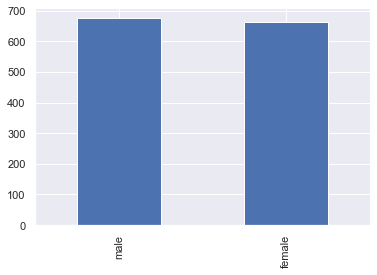

In [26]:
insured['sex'].value_counts().plot.bar()
plt.show()

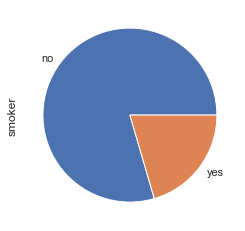

In [27]:
insured['smoker'].value_counts().plot.pie()
plt.show()

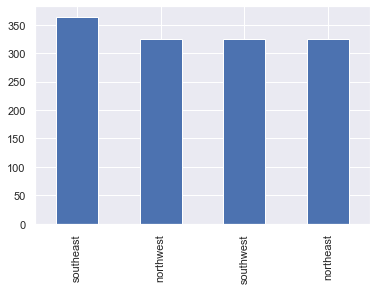

In [28]:
insured['region'].value_counts().plot.bar()
plt.show()

{'male': 676, 'female': 662}


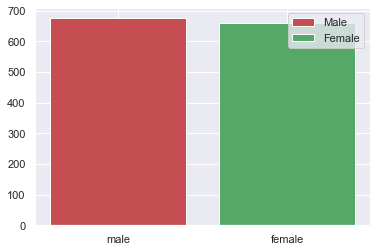

In [29]:
plot_data = dict(insured['sex'].value_counts())
print(plot_data)
bar = plt.bar(['male','female'],[plot_data['male'],plot_data['female']],color = ['r','g'])
plt.legend(bar, ['Male','Female'])
plt.show()

In [30]:
plot_data.keys()

dict_keys(['male', 'female'])

In [31]:
plot_data.values()

dict_values([676, 662])

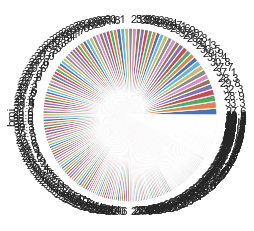

In [32]:
insured['bmi'].value_counts().plot.pie()
plt.show()

In [33]:
plot_data = dict(insured['smoker'].value_counts())
print(plot_data)

{'no': 1064, 'yes': 274}


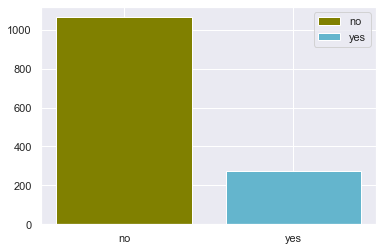

In [34]:
bars = plt.bar(plot_data.keys(), plot_data.values(), color=('olive', 'c'))
plt.legend(bars, plot_data.keys())
plt.show()

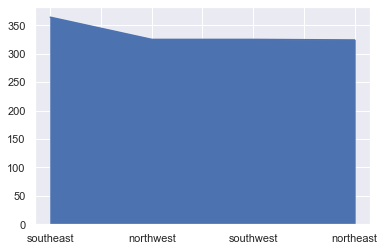

In [35]:
insured['region'].value_counts().plot.area()
plt.show()

In [36]:
# Bivariant

In [37]:
insured

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [38]:
corr_insured = insured[['age','bmi','expenses']]

In [39]:
corr_insured.corr()

,age,bmi,expenses
age,1.000000,0.109341,0.299008
bmi,0.109341,1.000000,0.198576
expenses,0.299008,0.198576,1.000000


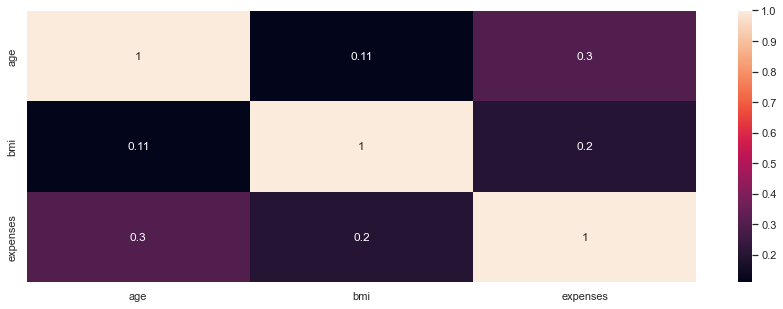

In [40]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_insured.corr(),annot=True)
plt.show()

<Figure size 360x360 with 0 Axes>

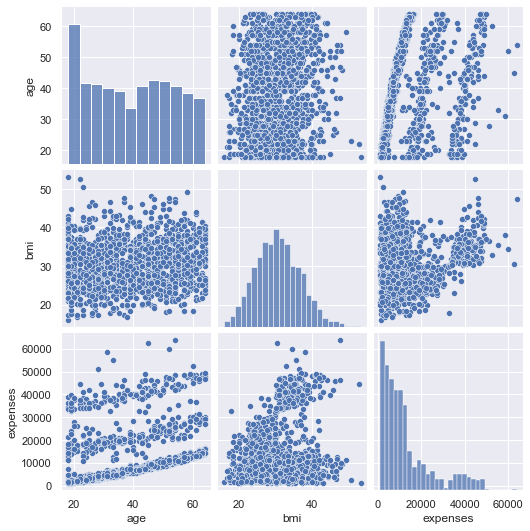

In [41]:
plt.figure(figsize=(5,5))
sns.pairplot(data=insured)
plt.show()

<AxesSubplot:xlabel='region', ylabel='count'>

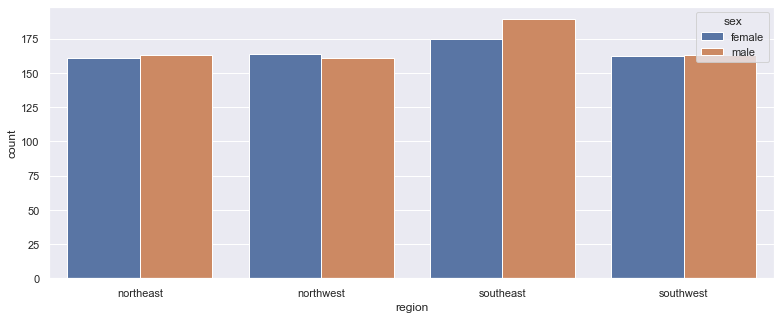

In [42]:
plt.figure(figsize=(13,5))
sns.countplot(x='region',hue='sex',data=insured)

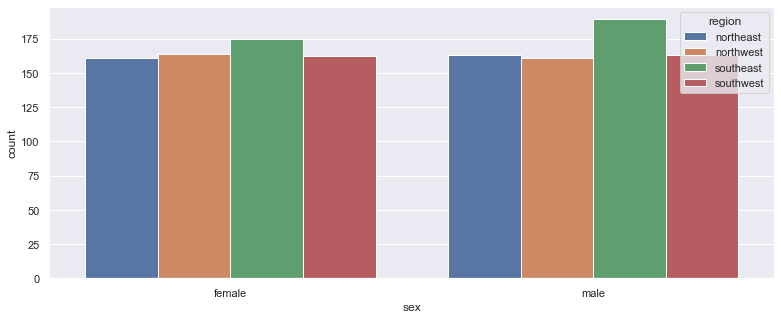

In [43]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='sex',hue='region',data=insured)

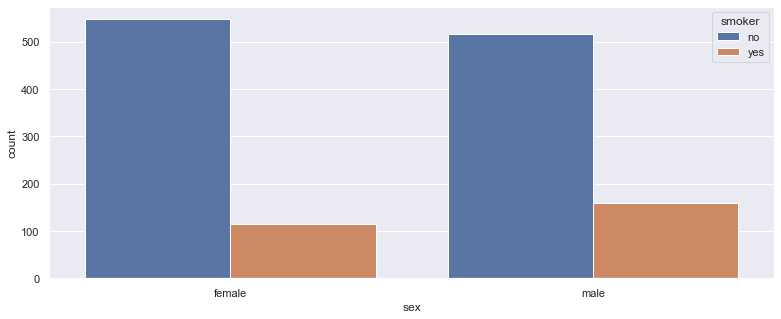

In [44]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='sex',hue='smoker',data=insured)

In [45]:
insured.groupby(insured['sex']).expenses.mean()

sex
female    12569.578897
male      13956.751420
Name: expenses, dtype: float64

In [46]:
insured.groupby(insured['sex']).expenses.sum()

sex
female    8321061.23
male      9434763.96
Name: expenses, dtype: float64

<AxesSubplot:xlabel='sex'>

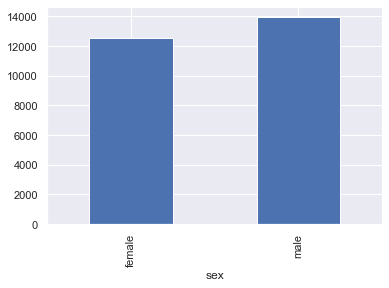

In [47]:
insured.groupby(insured['sex']).expenses.mean().plot.bar()

In [48]:
insured.groupby(insured['smoker']).expenses.mean()

smoker
no      8434.268449
yes    32050.231971
Name: expenses, dtype: float64

In [49]:
insured.groupby(insured['smoker']).expenses.sum()

smoker
no     8974061.63
yes    8781763.56
Name: expenses, dtype: float64

<AxesSubplot:xlabel='smoker'>

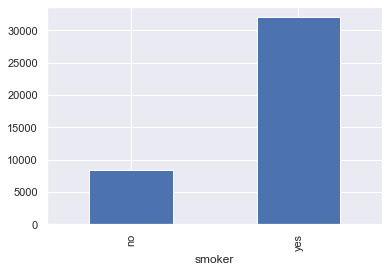

In [50]:
insured.groupby(insured['smoker']).expenses.mean().plot.bar()

In [51]:
plot_data = dict(insured.groupby(insured['sex']).expenses.mean())
plot_key = list(plot_data.keys())
plot_value = list(plot_data.values())
print(plot_key)
print(plot_value)
print(plot_data)

['female', 'male']
[12569.578897280968, 13956.751420118344]
{'female': 12569.578897280968, 'male': 13956.751420118344}


In [52]:
plot_data = dict(insured.groupby(insured['age']).expenses.mean())
plot_key = list(plot_data.keys())
plot_values = list(plot_data.values())
print(plot_key)
print(plot_values)
print(plot_data)

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
[7086.217971014493, 9747.909705882354, 10159.697931034483, 4730.464285714285, 10012.932857142858, 12419.820357142857, 10648.015714285715, 9838.365, 6133.825714285714, 12184.701428571429, 9069.1875, 10430.15962962963, 12719.111111111111, 10196.980000000001, 9220.299615384616, 12351.532307692309, 11613.52846153846, 11307.183200000001, 12204.4776, 18019.9116, 8102.732800000001, 11778.243600000002, 11772.25148148148, 9653.745555555555, 13061.038518518517, 19267.27962962963, 15859.397037037035, 14830.19931034483, 14342.591379310346, 17653.999655172414, 14632.5, 12696.00607142857, 15663.003103448276, 15682.255517241378, 18256.270344827586, 16020.930357142857, 18758.54642857143, 16164.545, 15025.517692307692, 16447.186153846156, 13878.928, 18895.869599999998, 21979.419130434784, 22024.45739130435, 19163.856

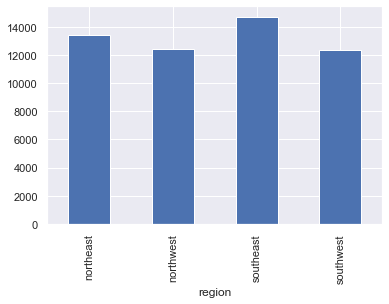

In [53]:
insured.groupby(insured['region']).expenses.mean().plot.bar()
plt.show()

[Text(0.5, 1.0, 'Sex Vs Expenses')]

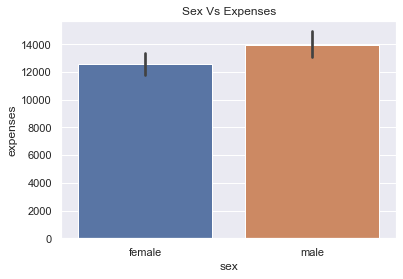

In [54]:
sns.barplot(x=insured.sex,y=insured.expenses).set(title='Sex Vs Expenses')

[Text(0.5, 1.0, 'Region Vs Expenses')]

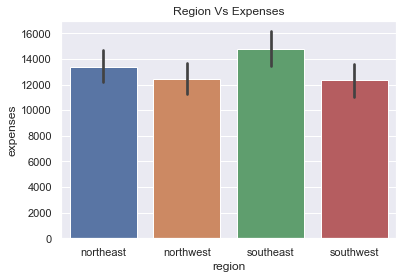

In [55]:
sns.barplot(x=insured['region'],y=insured['expenses']).set(title='Region Vs Expenses')

[Text(0.5, 1.0, 'Smoker Vs Expenses')]

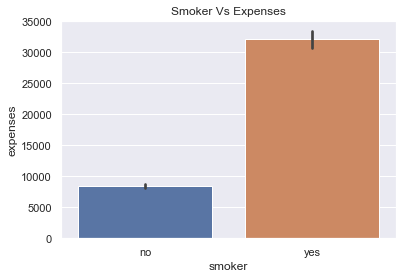

In [56]:
sns.barplot(x=insured['smoker'],y=insured['expenses']).set(title='Smoker Vs Expenses')

<AxesSubplot:ylabel='expenses'>

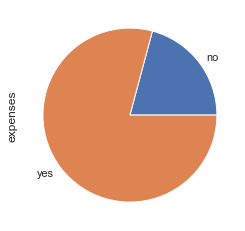

In [57]:
insured.groupby(insured['smoker']).expenses.mean().plot.pie()

In [58]:
# multivariate

In [59]:
insured

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


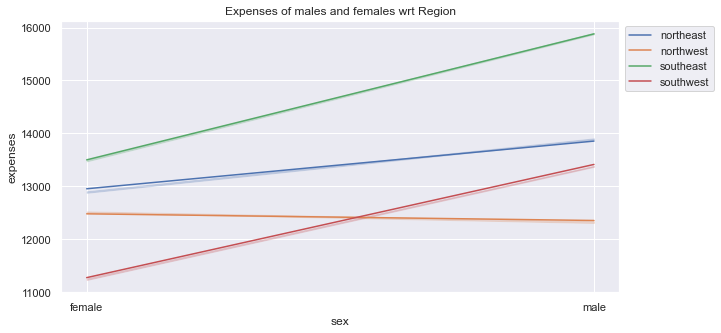

In [60]:
plt.figure(figsize=(10,5))
sns.lineplot(x = insured["sex"], y =insured["expenses"],hue=insured["region"],ci=1).set(title= 'Expenses of males and females wrt Region')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [61]:
region_sex_expenses =pd.crosstab(index=insured['region'], columns=insured.sex, values = insured.expenses, aggfunc='mean')
region_sex_expenses

sex,female,male
region,,
northeast,12953.203106,13854.005767
northwest,12479.870244,12354.119317
southeast,13499.669257,15879.617354
southwest,11274.411667,13412.884233


In [62]:
sex_reg_exp=pd.crosstab(index=insured.sex, columns=insured['region']  , values=insured.expenses,aggfunc='sum')
sex_reg_exp

region,northeast,northwest,southeast,southwest
sex,,,,
female,2085465.70,2046698.72,2362442.12,1826454.69
male,2258202.94,1989013.21,3001247.68,2186300.13


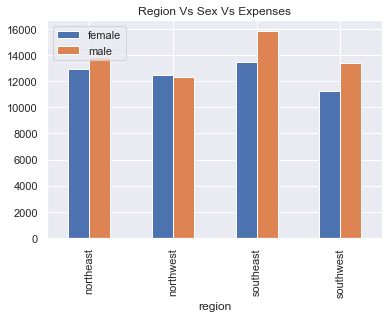

In [63]:
region_sex_expenses.plot(kind='bar',title="Region Vs Sex Vs Expenses")
plt.legend(loc='upper left')
plt.show()

In [64]:
smoker_sex_expenses =pd.crosstab(index=insured['smoker'], columns=insured.sex, values = insured.expenses, aggfunc='mean')
smoker_sex_expenses

sex,female,male
smoker,,
no,8762.297367,8087.204971
yes,30678.996261,33042.006226


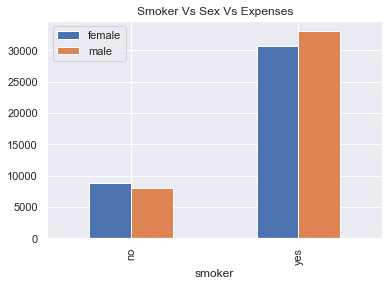

In [65]:
smoker_sex_expenses.plot(kind='bar',title="Smoker Vs Sex Vs Expenses")
plt.legend(loc='upper left')
plt.show()

In [66]:
insured

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
